# Teacher's book extraction probability

Probability of extracting a particular number in \[1,20\] from a book, assuming a completely casual extraction from only pages in \[100,300), by the sum of its digits.

This seems a reasonable assumption since a teacher is likely to open his/her book in the middle.

First we need our dataset, which is made of the sum of each individual page's digits:

In [1]:
import pandas as pd
%matplotlib inline
page_nums = pd.DataFrame([sum([int(j) for j in str(i)]) for i in range(100,300)])
page_nums.tail()

,0
195,16
196,17
197,18
198,19
199,20


Mind that the dataset starts at position 0, so position 199 is the 299th page of the book.

Then we need to get the frequency of each number:

In [2]:
freq = page_nums[0].value_counts()
freq.sort_index()

1      1
2      3
3      5
4      7
5      9
6     11
7     13
8     15
9     17
10    19
11    19
12    17
13    15
14    13
15    11
16     9
17     7
18     5
19     3
20     1
Name: 0, dtype: int64

As we can see numbers in the middle are disadvantaged.

We divide by the number of pages to obtain the probability of each student to be extracted:

In [3]:
prob_fun = freq / 200
prob_fun = prob_fun.sort_index()
prob_fun

1     0.005
2     0.015
3     0.025
4     0.035
5     0.045
6     0.055
7     0.065
8     0.075
9     0.085
10    0.095
11    0.095
12    0.085
13    0.075
14    0.065
15    0.055
16    0.045
17    0.035
18    0.025
19    0.015
20    0.005
Name: 0, dtype: float64

To be a valid probability function its value's sum must equal 1:

In [4]:
sum(prob_fun)

1.0

Now we can plot the probability to get a better understanding of its unfairness:

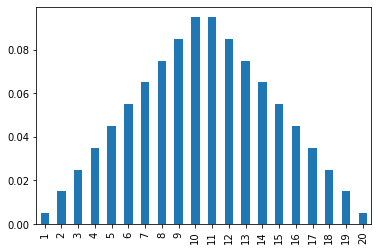

In [5]:
prob_fun.plot(kind='bar')

We can see how this is unfair, number 10 and 11 are the most likely to be called with a probability of 10%, compared to number 2-3 with just a 2%.